## Importing necessary libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pyplot as plt
import random

## Getting the article from the api

In [2]:
# getting the article form the api
def get_content(title):
    session = requests.Session()

    url = "https://en.wikipedia.org/w/api.php"

    PARAMS = {
        "action": "query",
        "prop": "revisions",
        "titles":title,
        "rvslots":"*",
        "rvprop": "content",
        "formatversion": "2",
        "format": "json"
    }

    result = session.get(url=url, params=PARAMS)


    return result.json()

In [3]:
data = get_content('ozone_layer')

## Merging the content

In [4]:
def merge_contents(data):
    data = data['query']['pages'][0]['revisions'][0]['slots']['main']['content']
    # Remove splitter characters
    data = re.sub(r'[^\w\s]', '', data)
    data = re.sub(r'http://\S+|https://\S+', '', data)
    content = re.sub(r'{{cite[^}}]+}}', '', data)
    return content

merged_content = merge_contents(data)
print(merged_content)

Short descriptionRegion of the stratosphere
ppsemiindef
FileOzone cyclesvgthumbupright15Ozoneoxygen cycle in the ozone layer

The ozone layer or ozone shield is a region of Earths stratosphere that absorbs most of the Suns ultraviolet  radiation It contains a high concentration of ozone Osub3sub in relation to other parts of the atmosphere although still small in relation to other gases in the stratosphere The ozone layer contains less than 10 parts per million of ozone while the average ozone concentration in Earths atmosphere as a whole is about 03 parts per million The ozone layer is mainly found in the lower portion of the stratosphere from approximately convert15to35kmspus0 above Earth although its thickness varies seasonally and geographicallyrefcite weburlhttpwwwozonelayernoaagovsciencebasicshtmtitleOzone BasicswebsiteNOAAdate20080320accessdate20070129archiveurlhttpswebarchiveorgweb20171121051325httpwwwozonelayernoaagovsciencebasicshtmarchivedate20171121urlstatusdeadref

The ozo

## Preprocessing and Tokenization

In [5]:
def tokenize(data):
    split_list = ['\n', '.', ',', ' ']
    ans = data.split(split_list[0])
    ans1 = " ".join(ans).split(split_list[1])
    ans1 = " ".join(ans).split(split_list[2])
    words = " ".join(ans1).split(split_list[3])
    return [word.replace('.', '') for word in words if word != '']
tokens = tokenize(merged_content)

In [6]:
exp = ['Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'Aliquam', 'a', 'cursus', 'elit', 'sed', 'viverra', 'justo', 'Integer', 'tempus', 'ante', 'at', 'odio', 'commodo', 'et', 'ornare', 'ipsum', 'dapibus', 'Donec', 'bibendum', 'sit', 'amet', 'urna', 'sit', 'amet', 'facilisis', 'Donec', 'accumsan', 'odio', 'ligula', 'Proin', 'sodales', 'sapien', 'at', 'risus', 'viverra', 'at', 'vehicula', 'dolor', 'malesuada', 'Aenean', 'scelerisque', 'tristique', 'ultricies', 'Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'Etiam', 'euismod', 'scelerisque', 'lacinia', 'Proin', 'sit', 'amet', 'nisi', 'orci', 'Donec', 'aliquet', 'eros', 'ac', 'sem', 'fringilla', 'eu', 'rutrum', 'urna', 'malesuada', 'Cras', 'ut', 'congue', 'massa', 'Nam', 'fermentum', 'odio', 'ac', 'purus', 'varius', 'ac', 'tempus', 'elit', 'bibendum', 'Donec', 'turpis', 'leo', 'imperdiet', 'eget', 'blandit', 'non', 'commodo', 'auctor', 'risus', 'Praesent', 'interdum', 'bibendum', 'gravida'] 
test = tokenize('Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam a cursus elit, sed viverra justo. Integer tempus ante at odio commodo, et ornare ipsum dapibus. Donec bibendum sit amet urna sit amet facilisis. Donec accumsan odio ligula. Proin sodales sapien at risus viverra, at vehicula dolor malesuada. Aenean scelerisque tristique ultricies. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Etiam euismod scelerisque lacinia. Proin sit amet nisi orci. Donec aliquet eros ac sem fringilla, eu rutrum urna malesuada. Cras ut congue massa. Nam fermentum odio ac purus varius, ac tempus elit bibendum. Donec turpis leo, imperdiet eget blandit non, commodo auctor risus. Praesent interdum bibendum gravida.')
if exp == test:
    print(True)
else:
    print(False)

True


## Lower the case of all words

In [7]:
def lower_collection(tokens):
    return [word.lower() for word in tokens]

tokens = lower_collection(tokens)

## Counting the frequencies

In [8]:
def count_frequency(tokens):
    word_counts = {}
    for word in tokens:
        word = word.lower()
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

word_counts =  count_frequency(tokens)

In [9]:
def print_count_frequency(word_counts, n):
    # Get the n most frequent words and their frequencies
    most_frequent = word_counts.most_common(n)
    
    # Extract the words and their frequencies into separate lists
    words = [word for word, count in most_frequent]
    counts = [count for word, count in most_frequent]
    # printing the frequencies 
    for i in range(len(words)):
        print(f'{words[i]} = {counts[i]}')
    
print_count_frequency(Counter(word_counts), 20)

the = 241
of = 134
ozone = 112
and = 90
in = 79
to = 65
is = 42
layer = 39
a = 32
by = 31
that = 22
radiation = 21
ultraviolet = 18
from = 17
for = 17
are = 17
was = 16
with = 16
depletion = 16
at = 15


## Plotting the Most Frequenct Words

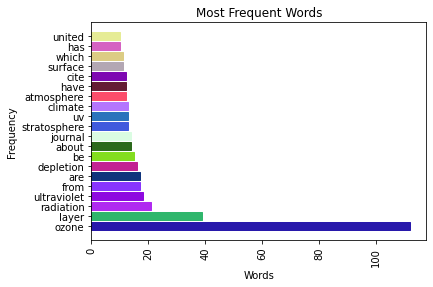

In [13]:
def plot_most_frequent(word_counts, n):
    most_frequent = word_counts.most_common(n)
    words = [word for word, count in most_frequent]
    counts = [count for word, count in most_frequent]
    # Plot the histogram
    bar_list = plt.barh(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Most Frequent Words')
    plt.xticks(rotation=90)
    
    # Assigning random colors to the bars
    for brl in bar_list:
        r, g, b = random.random(), random.random(), random.random()
        brl.set_color((r, g, b))
        
    # Show plot
    plt.show()

# Example usage
word_counts = Counter(word_counts)
plot_most_frequent(word_counts, 20)


## Removing Stop Words

In [11]:
def remove_stop_words(words, stop_words):
    result = []
    for word in words:
        if word not in stop_words:
            result.append(word)
    return result
stop_words = ['the', 'and', 'of', 'to', 'a', 'in', 'that', 'it', 'with', 'for', 'is', 'on', 'was', 'as', 'by', 'at', 'an', 'this']
filtered_collection = remove_stop_words(tokens, stop_words)        

## Plotting the Filtered Words

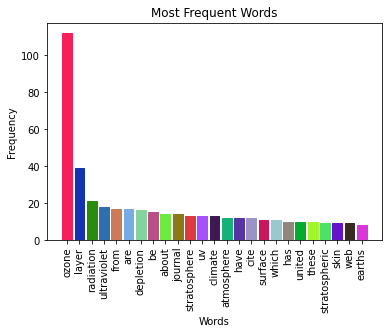

In [12]:
word_counts = Counter(filtered_collection)
plot_most_frequent(word_counts, 25)